## MNIST HANDWRITTEN DIGIT RECOGNITION

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike

In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2024-11-02 12:58:50.166225: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 12:58:50.232143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 12:58:50.233129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 12:58:51.064949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Artificial Neural Networks
- Artificial Neural Networks (ANN) are computing systems inspired by Biological Neural Networks
- Essentially they consists of Layers & Nodes (Neurons), with each connection representing a synapse between neurons.
- These networks process the data by passing it through the layers, with each transforming the data in specific way.

ANNs are foundation to Deep Learning, Mostly used in..
- Image & Speech recognition
- Natural Language Processing
- Solving complex games

These are capable of learning patterns from vast amounts of data.

### Single Layer Neural Network
A single layer neural network is called Perceptron.

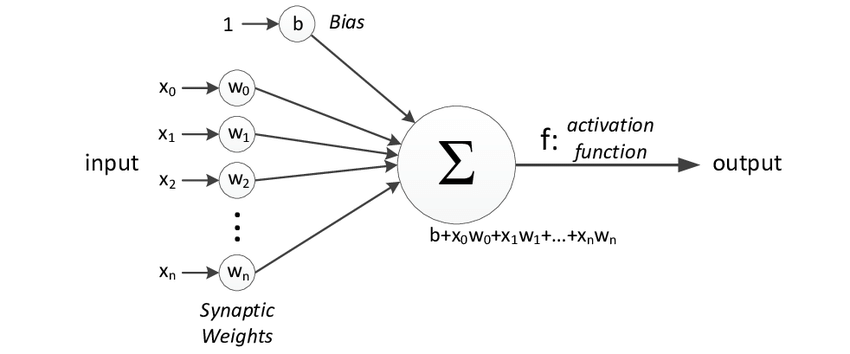

- For single observation, `x0, x1, x2, ... , xn`. Each input is multiplied by weight, `w0, w1, w2, ..., wn`.
- Weights show the strength of the node.
- Bias `b` allows us to shift the `activation function` up or down.


### Activation Function
Activation function decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it. The motive is to introduce non-linearity into the output of a neuron

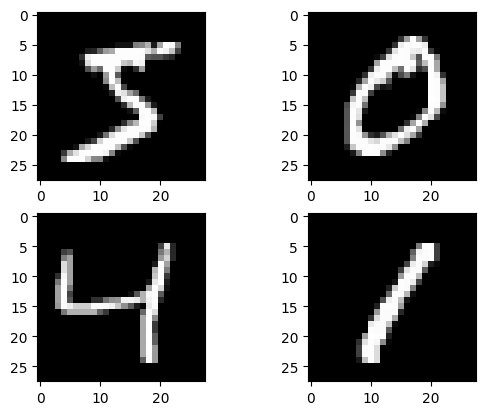

In [3]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap("gray"))

plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap("gray"))

plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap("gray"))

plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap("gray"))

plt.show()

## Cleaning Data

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train.shape

(60000,)

In [6]:
image_rows, image_cols = 28, 28
num_pixels = image_rows * image_cols

x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Normalize the data from 255 to 0 - 1
x_train /= 255
x_test /= 255

### Convert the labels into binary class

In [9]:
from keras.utils import to_categorical

num_classes = 10

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Model Desing

In [11]:
import tensorflow as tf

In [12]:
input_dim = tf.expand_dims(x_train,axis=1)

2024-11-02 12:58:53.510379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-02 12:58:53.511187: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-02 12:58:53.517489: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


In [13]:
input_dim

<tf.Tensor: shape=(60000, 1, 28, 28), dtype=float64, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import Dropout
from keras.layers import Flatten
def neural_network_model():
    nn = Sequential()
    nn.add(Flatten(input_shape=(image_rows, image_cols, 1))) # Converts 28*28 images into 1D vector of 784 features to make compatible with Dense Layers.
    nn.add(Dense(
        units=num_pixels, activation="relu",
        kernel_initializer="normal"
    ))
    nn.add(Dense(
        units=128, activation="relu",
        kernel_initializer="normal"
    ))
    nn.add(Dense(
        units=num_classes,
        activation="softmax",
        kernel_initializer="normal"
    ))
    
    nn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return nn

In [15]:
# Plot Accuracy & Loss

import matplotlib.pyplot as plt

def plot_accuracy(history):
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='train_accuracy')
    ax1.plot(history.history['val_accuracy'], label='val_accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'], label='train_loss')
    ax2.plot(history.history['val_loss'], label='val_loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [16]:
print(f"{x_test.shape=}")
print(f"{y_test.shape=}")

x_test.shape=(10000, 28, 28)
y_test.shape=(10000, 10)


In [17]:
batch_size = 128
epochs = 10

model = neural_network_model()
print(model.summary())

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs, batch_size=batch_size,
    verbose=2
)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {round(loss*100, 2)}")
print(f"Test Accuracy {round(accuracy*100, 2)}")
model.save("test_nn.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
469/469 - 4s - loss: 0.2497 - accuracy: 0.9294 - val_loss: 0.1191 - val_accuracy: 0.9643 - 4s/epoch - 9ms/step
Epoch 2/10
469/469 - 3s -

/home/naveen/Projects/MachineLearning/digit_recognizer_nn/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


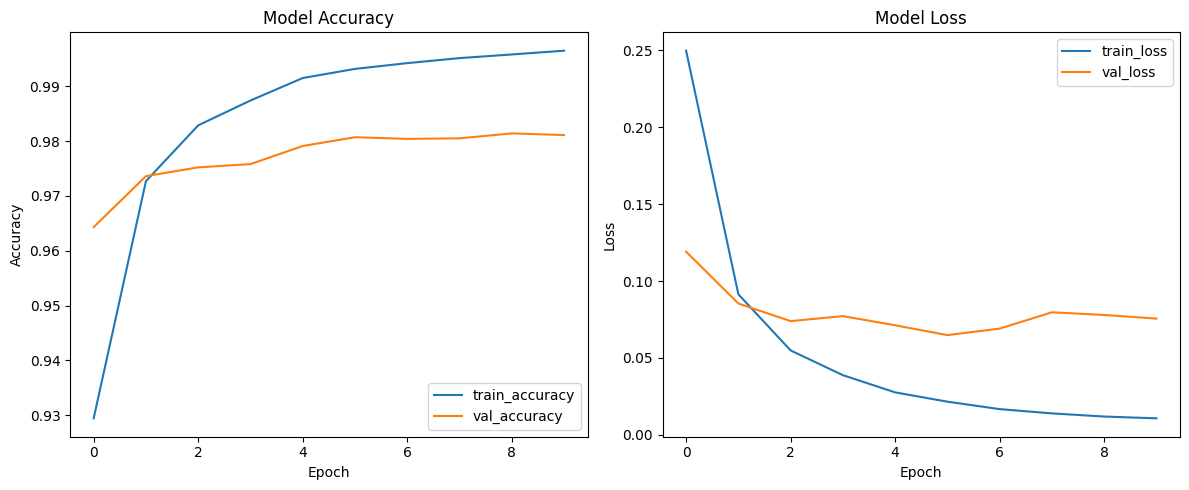

In [18]:
plot_accuracy(history=history)

In [19]:
model.save("test_nn.keras")

In [21]:
from keras.utils import plot_model

plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
x_test.shape, y_test

((10000, 28, 28),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [25]:
from keras.models import load_model

m = load_model(filepath="test_nn.keras")
loss1, accuracy1 = model.evaluate(x_test, y_test, verbose=0)

In [26]:
loss1, accuracy1

(0.07557757943868637, 0.9811000227928162)

In [31]:
y_test_predict = m.predict(x_test[0].reshape(-1, 28, 28))

1/1 [==============================] - 0s 20ms/step


In [34]:
np.argmax(y_test_predict)

7

In [35]:
np.argmax(y_test[0])

7

In [38]:
y_test_predict = m.predict(x_test)

y_test_predict = np.argmax(y_test_predict, axis=1)

313/313 [==============================] - 1s 2ms/step


In [39]:
y_test_predict

array([7, 2, 1, ..., 4, 5, 6])

In [43]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

accuracy_score(y_pred=y_test_predict, y_true=np.argmax(y_test, axis=1))




0.9811

<Axes: >

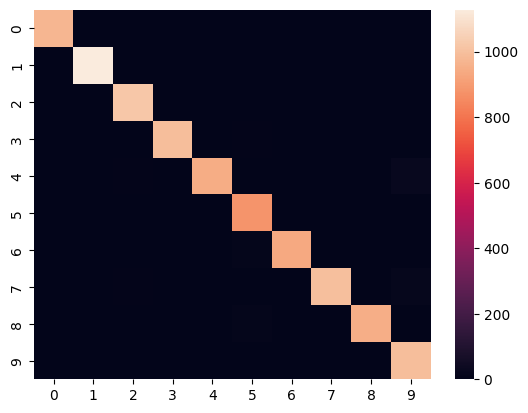

In [51]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred=y_test_predict, y_true=np.argmax(y_test, axis=1)))